In [9]:
import pandas as pd

data = pd.read_csv('EuCitiesTemperatures.csv')

# Task 1: 
mean_coords = data.groupby('country')[['latitude', 'longitude']].mean().round(2)
data['latitude'] = data.apply(lambda row: mean_coords.loc[row['country'], 'latitude'] if pd.isnull(row['latitude']) else row['latitude'], axis=1)
data['longitude'] = data.apply(lambda row: mean_coords.loc[row['country'], 'longitude'] if pd.isnull(row['longitude']) else row['longitude'], axis=1)

# Task 2: 
subset_cities = data[(data['latitude'] >= 40) & (data['latitude'] <= 60) & (data['longitude'] >= 15) & (data['longitude'] <= 30)]
countries_max_cities = subset_cities['country'].value_counts().idxmax()

# Task 3: 
region_types_mean_temp = data.groupby(['EU', 'coastline'])['temperature'].transform('mean')
data['temperature'] = data.apply(lambda row: region_types_mean_temp[row.name] if pd.isnull(row['temperature']) else row['temperature'], axis=1)

data.info(), countries_max_cities, data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         213 non-null    object 
 1   country      213 non-null    object 
 2   population   213 non-null    float64
 3   EU           213 non-null    object 
 4   coastline    213 non-null    object 
 5   latitude     213 non-null    float64
 6   longitude    213 non-null    float64
 7   temperature  213 non-null    float64
dtypes: float64(4), object(4)
memory usage: 13.4+ KB


(None,
 'Romania',
         city  country  population   EU coastline  latitude  longitude  \
 0    Elbasan  Albania        2.90   no       yes     41.12      20.08   
 1    Andorra  Andorra        0.07   no        no     42.50       1.52   
 2  Innsbruck  Austria        8.57  yes        no     47.85      11.41   
 3       Graz  Austria        8.57  yes        no     47.08      14.02   
 4       Linz  Austria        8.57  yes        no     48.32      14.29   
 
    temperature  
 0    15.180000  
 1     7.481538  
 2     4.540000  
 3     6.910000  
 4     6.790000  )

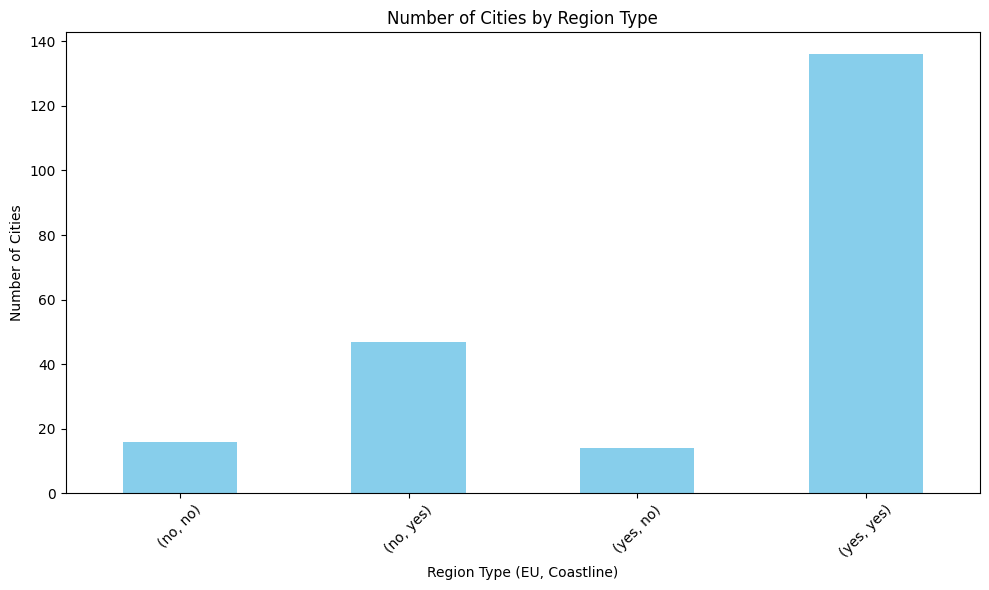

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

region_counts = data.groupby(['EU', 'coastline']).size()

plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Region Type (EU, Coastline)')
plt.ylabel('Number of Cities')
plt.title('Number of Cities by Region Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

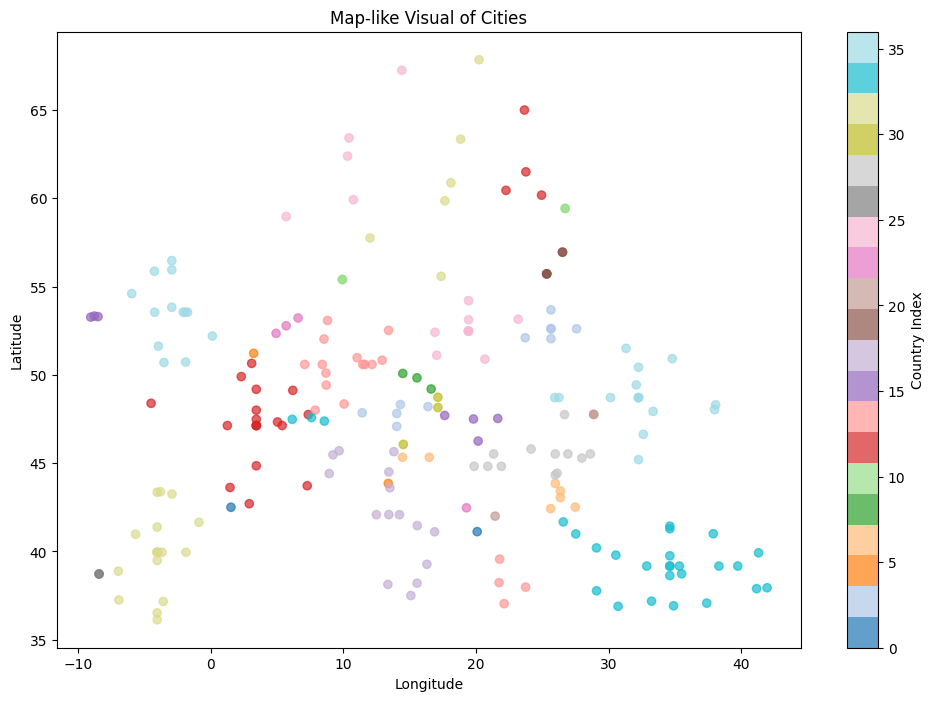

In [13]:
country_colors = {country: i for i, country in enumerate(data['country'].unique())}

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['country'].map(country_colors), cmap='tab20', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map-like Visual of Cities')
plt.colorbar(label='Country Index')
plt.show()

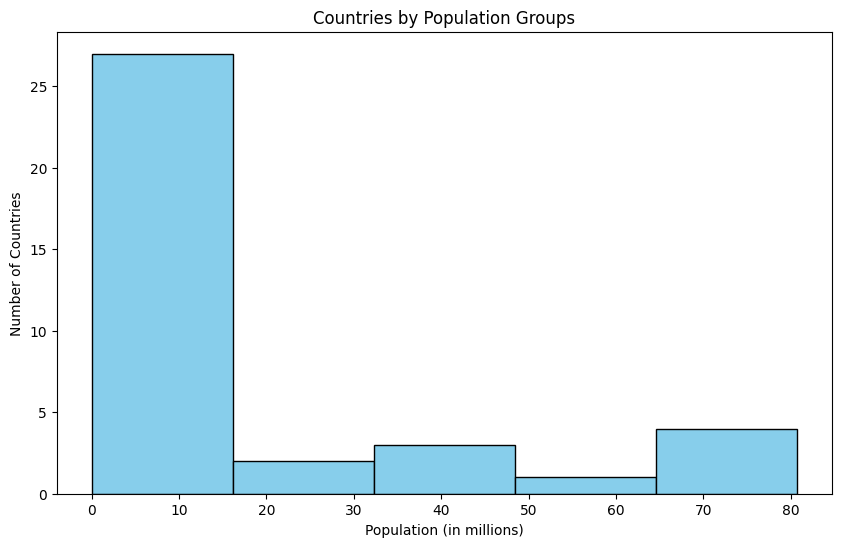

In [4]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data['population'].unique(), bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Population (in millions)')
plt.ylabel('Number of Countries')
plt.title('Countries by Population Groups')
plt.show()


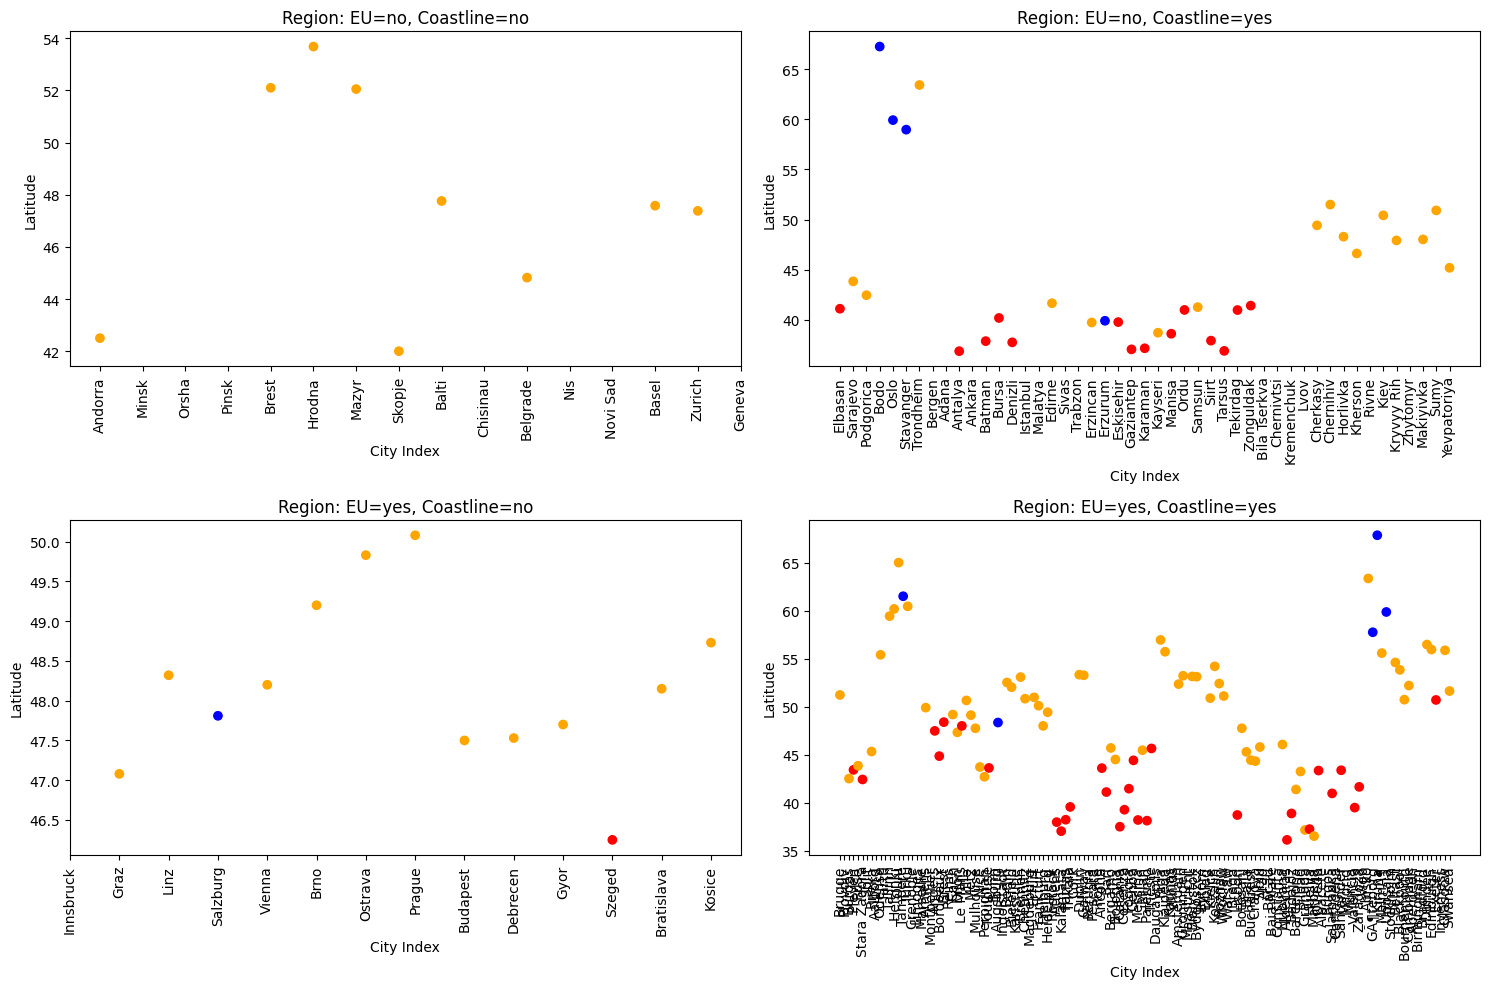

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for index, (region, group_data) in enumerate(data.groupby(['EU', 'coastline'])):
    ax = axs[index // 2, index % 2]  # Determine the subplot position
    colors = group_data['temperature'].apply(lambda x: 'red' if x > 10 else 'blue' if x < 6 else 'orange')
    ax.scatter(range(len(group_data)), group_data['latitude'], c=colors)
    ax.set_xticks(range(len(group_data)))
    ax.set_xticklabels(group_data['city'], rotation=90)
    ax.set_title(f"Region: EU={region[0]}, Coastline={region[1]}")
    ax.set_xlabel('City Index')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()